# Notebook on NDW Traffic dataset for Phase 2 - Data Provisioning



### Data Source 

The dataset for this project comes from the **National Road Traffic Data Bank (NDW)**, which provides open traffic data for the Netherlands. NDW collects information through thousands of road sensors that continuously measure traffic intensity, speed, and other road characteristics. The dataset was downloaded from the NDW Open Data Portal ([https://opendata.ndw.nu/](https://opendata.ndw.nu/)) as a CSV file and contains measurements for the Eindhoven region.  

The data is useful because it allows the analysis and prediction of traffic conditions. By using variables such as average intensity, speed, number of lanes, road classification, and reference values, it is possible to train machine learning models that simulate scenarios such as higher traffic volumes or infrastructure changes. This provides valuable insights for traffic management, urban planning, and improving road safety.  

## Data Provisioning

#### Data Requirements
- **Target variable**: congestion level (`calm`, `normal`, `Jam`)  
- **Required features**:  
  - Time-related: `start_measurement_period`, `end_measurement_period`, `used_minutes_intensity`, `used_minutes_speed`  
  - Traffic measures: `avg_intensity`, `avg_speed`  
  - Road/lane characteristics: `lane_carriageway`, `total_number_of_lanes`, `driving_direction`, `specific_lane`  
  - Location details: `name_measuring_location`, `predecessor`, `successor`   


These features allow us to connect **traffic flow, speed and road characteristics** to a congestion state.  

### Data Definition

A list of features is provided below. These variables come from the NDW (Nationaal Dataportaal Wegverkeer) traffic monitoring system in the Netherlands.  
They represent measurements collected from loop detectors and roadside sensors at different highway locations.  
Some additional explanation is given to clarify the meaning of each feature.

(1) measurement_location_id: A unique identifier for each sensor site on the Dutch highway network.  

(2) start_measurement_period: The timestamp marking the start of a 15-minute measurement interval.  

(3) end_measurement_period: The timestamp marking the end of a 15-minute measurement interval (15 minutes after start).  

(4) used_minutes_intensity: Number of valid minutes within the 15-minute period for which traffic intensity was measured.  

(5) used_minutes_speed: Number of valid minutes within the 15-minute period for which traffic speed was measured.  

(6) avg_intensity: The average number of vehicles passing the sensor during the 15-minute window, expressed in vehicles per 15 minutes.  

(7) avg_speed: The average driving speed of vehicles during the 15-minute window, expressed in kilometers per hour (km/h).  

(8) lane_carriageway: Indicates which lane of the road the measurement comes from (e.g. lane1, lane2, lane3, lane4).  

(9) total_number_of_lanes: The total number of lanes available in that road section (between 1 and 4).  

(10) driving_direction: Indicates the travel direction of vehicles (northBound, southBound, eastBound, or westBound).  

(11) specific_lane: Specifies the type of lane being measured. Most records correspond to “mainCarriageway”, but other categories exist (e.g. entry/exit).  

(12) name_measuring_location: A textual description of the measurement location, often containing road code and junction name (e.g. “A50 northBound naar Oss op knooppunt Ekkersweijer”).  

(13) predecessor: Reference to the previous measurement location in the NDW sensor chain (often missing).  

(14) successor: Reference to the next measurement location in the NDW sensor chain (often missing).  

(15) technical_exclusion: NDW flag that indicates whether a measurement was excluded due to technical reasons (mostly missing).  

(16) traffic_flow_deviation_exclusions: NDW flag for traffic flow deviations or measurement anomalies (mostly missing).  


### Data Collection 

In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [53]:
df_st = pd.read_parquet('./data/DataMerged.parquet')

In [54]:
# translations moves to other file for better overview
from helpers.columns_names_trans import renamed_st, renamed_jams
df_st = df_st.rename(columns=renamed_st)

In [55]:
df_st.sample(5)

,measurement_location_id,ndw_index,start_measurement_period,end_measurement_period,used_minutes_intensity,used_minutes_speed,avg_intensity,avg_speed,lane_carriageway,total_number_of_lanes,driving_direction,specific_lane,name_measuring_location,predecessor,successor,technical_exclusion,traffic_flow_deviation_exclusions
29736862,RWS01_MONIBAS_0671hrl0186ra,F3A,2025-07-12 22:15:00,2025-07-12 22:30:00,15.00,15.00,388.00,106.48,lane2,2,westBound,mainCarriageway,A67 westBound naar Turnhout na afrit N2 ri knp...,NaN,NaN,None,NaN
4416758,RWS01_MONIBAS_0021hrr1719ra,F3A,2025-05-26 07:15:00,2025-05-26 07:30:00,15.00,15.00,1172.00,105.18,lane2,3,southBound,mainCarriageway,A2 southBound naar Maastricht-Noord na afrit N...,NaN,NaN,None,NaN
3039228,RWS01_MONIBAS_0021hrr1573ra,F5A,2025-04-07 11:15:00,2025-04-07 11:30:00,15.00,15.00,988.00,88.26,lane3,3,southBound,mainCarriageway,A2 southBound naar Maastricht-Noord op knppnt ...,NaN,NaN,None,NaN
31468737,RWS01_MONICA_00D04302E01998200007,F3B,2025-08-30 21:00:00,2025-08-30 21:15:00,15.00,3.00,12.00,78.83,lane1,1,eastBound,connectingCarriageway,A67 eastBound naar Eindhoven vw van A67 vanuit...,NaN,NaN,None,NaN
19306381,RWS01_MONICA_00D0021A9C42D0050011,F27B,2025-02-12 00:45:00,2025-02-12 01:00:00,15.00,0.00,0.00,-1.00,lane4,1,northBound,mainCarriageway,A2 northBound naar Eindhoven op knppnt Leender...,NaN,NaN,None,NaN


In [56]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32015767 entries, 0 to 32015766
Data columns (total 17 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   measurement_location_id            object 
 1   ndw_index                          object 
 2   start_measurement_period           object 
 3   end_measurement_period             object 
 4   used_minutes_intensity             float64
 5   used_minutes_speed                 float64
 6   avg_intensity                      float64
 7   avg_speed                          float64
 8   lane_carriageway                   object 
 9   total_number_of_lanes              int64  
 10  driving_direction                  object 
 11  specific_lane                      object 
 12  name_measuring_location            object 
 13  predecessor                        float64
 14  successor                          float64
 15  technical_exclusion                object 
 16  traffic_flow_dev

#### tabel analyses:
This is a raw traffic dataset from NDW, consisting of over 32 million measurements over a 15-minute period per sensor location. The table contains both numerical values ​​(such as traffic volume and speed) and categorical and textual descriptions (such as direction of travel, measurement location). Some columns contain many missing values ​​and will be cleaned or removed later during data preparation.

In [57]:
# numeric columns describe
pd.set_option("display.float_format", "{:.2f}".format)  # change to 2 decimals
df_st.describe(exclude=[object])

,used_minutes_intensity,used_minutes_speed,avg_intensity,avg_speed,total_number_of_lanes,predecessor,successor,traffic_flow_deviation_exclusions
count,31977285.00,31977285.00,31977285.00,31977285.00,32015767.00,0.00,0.00,0.00
mean,14.38,10.99,376.51,82.22,1.70,NaN,NaN,NaN
std,2.94,5.63,468.18,38.97,0.87,NaN,NaN,NaN
min,0.00,0.00,-1.00,-1.00,1.00,NaN,NaN,NaN
25%,15.00,7.00,12.00,80.62,1.00,NaN,NaN,NaN
50%,15.00,15.00,144.00,94.61,1.00,NaN,NaN,NaN
75%,15.00,15.00,644.00,106.17,2.00,NaN,NaN,NaN
max,15.00,15.00,5388.00,254.00,4.00,NaN,NaN,NaN


In [58]:
df_st.describe(include=[object])
df_st.shape

(32015767, 17)

In the describe methods above you can see the numberic and date values and underneath it the other like numbers datetime etc. 

- **Negative values**
  - `avg_intensity` and `avg_speed` contain `-1` → indicates missing/invalid data.  
  - `specific_lane`: 4 unique values (mostly `mainCarriageway`). → drop other except mainCarriage, because we only measure the main road
  - `lane_carriageway`: 4 unique values (e.g., lane1, lane2).  → extract the numbers only 

- **Unrealistic/High values**
  - `avg_speed` max = 254 km/h (very high, likely outlier).  
  - `avg_intensity` max = 5388.00 vehicles per 15 min (check for outliers).  

- **Incomplete quarters**
  - `used_minutes_speed` and `used_minutes_intensity` < 15 → incomplete measurement periods.  

- **Lanes**
  - `total_number_of_lanes` ranges from 1 to 4 → reflects different road types.  

- **Categorical features**
  - `lane_carriageway`: 4 unique values (e.g., lane1, lane2).  
  - `driving_direction`: 4 unique values (e.g., northBound, southBound).  

- **Measurement locations**
  - `name_measuring_location`: 309 unique values.  
  - `measurement_location_id`: 288 unique values → almost 1:1 with names. 

#### Data understanding/dictionary

A **data dictionary** has been created to document all dataset features.  
It specifies the name, type, units, valid range/values, description, source, and quality notes.  
This ensures clarity, consistency, and transparency for all project members and stakeholders.  

| Feature                         | Type     | Units         | Valid Range / Values                  | Description                                                           | Source | Quality Notes |
|---------------------------------|----------|---------------|--------------------------------------|-----------------------------------------------------------------------|--------|---------------|
| measurement_location_id          | string   | –             | 293 unique IDs                        | Identifier of the physical measuring location                         | NDW    | Unique per sensor |
| start_measurement_period         | datetime | UTC timestamp | 2025-01-01 → 2025-09-26               | Start of 15-min measurement interval                                  | NDW    | Always present |
| end_measurement_period           | datetime | UTC timestamp | 2025-01-01 → 2025-09-26               | End of 15-min measurement interval                                    | NDW    | Derived if missing |
| used_minutes_intensity           | float    | minutes       | 0–15 (mean ≈ 14.3)                    | Minutes with valid intensity measurement                              | NDW    | <15 → incomplete |
| used_minutes_speed               | float    | minutes       | 0–15 (mean ≈ 10.4)                    | Minutes with valid speed measurement                                  | NDW    | <15 → incomplete |
| avg_intensity                    | float    | vehicles/15m  | -1 → 3240 (mean ≈ 417)                | Average number of vehicles detected per 15 min                        | NDW    | -1 = invalid; high outliers |
| avg_speed                        | float    | km/h          | -1 → 250 (mean ≈ 87)                  | Average vehicle speed during interval                                 | NDW    | -1 = invalid; 250 unrealistic |
| lane_carriageway                 | string   | lane index    | {lane1, lane2, lane3, lane4}          | Lane identifier within the carriageway                                | NDW    | Parsed to integer later |
| total_number_of_lanes            | int      | lanes         | 1–4 (mean ≈ 1.7)                      | Total number of lanes in road section                                 | NDW    | Consistent |
| driving_direction                | category | –             | {northBound, southBound, eastBound, westBound} | Direction of travel                                      | NDW    | Balanced categories |
| specific_lane                    | category | –             | {mainCarriageway, …} (4 unique)       | Lane type measured                                                    | NDW    | Filtered to mainCarriageway |
| name_measuring_location          | string   | –             | 277 unique values                     | Textual location (e.g. “A50 northBound naar Oss…”)                    | NDW    | Used to extract road_code |
| predecessor                      | string   | –             | Mostly NaN                            | Refers to previous measurement location in NDW chain                  | NDW    | >99% missing, dropped |
| successor                        | string   | –             | Mostly NaN                            | Refers to next measurement location in NDW chain                      | NDW    | >99% missing, dropped |
| technical_exclusion              | string   | –             | Mostly NaN                            | NDW flag for technical issues                                         | NDW    | Not filled, dropped |
| traffic_flow_deviation_exclusions| string   | –             | Mostly NaN                            | NDW exclusion info for traffic flow deviations                        | NDW    | Empty, dropped |

---

**Notes**
- Negative values in `avg_speed` and `avg_intensity` are **invalid markers** (to be dropped).  
- `used_minutes_* < 15` indicates **incomplete intervals**, also dropped.  
- `specific_lane` will be reduced to `mainCarriageway` only.  
- `road_code` (A2, A50, A58, …) is extracted from `name_measuring_location` during preprocessing.  
- The four columns **predecessor, successor, technical_exclusion, traffic_flow_deviation_exclusions** exist in the raw dataset but contain almost only NaN → **removed during Data Preparation**. 

This is a large-scale highway traffic dataset with both numerical (speed, intensity, completeness) and categorical features (location, lane, direction). It includes quality issues such as missing values, invalid markers (-1), and unused columns, which will be addressed during data preparation.

### **Missing values overview**

I see in the table that most of the important columns such as `measurement_location_id`, `ndw_index`, `start_measurement_period`, `end_measurement_period`, `lane_carriageway`, `total_number_of_lanes` and `specific_lane` have **no missing values**. This means the core structure of the dataset is intact.  

However, there are some issues:  
- Around **38,000 rows** are missing values for `used_minutes_intensity`, `used_minutes_speed`, `avg_intensity`, and `avg_speed`. These are caused by incomplete or failed sensor measurements.  
- The column `driving_direction` has more than **4.3 million missing values**, and `name_measuring_location` is also missing for about **944,000 rows**.  
- Some columns are **almost completely empty**, such as `predecessor`, `successor`, `technical_exclusion`, and `traffic_flow_deviation_exclusions`. These contain no useful information and will need to be dropped.  

In short: the dataset is mostly complete, but some measurement variables contain small gaps and several metadata fields are essentially empty and not useful for analysis.  

In [59]:
df_st.isna().sum()
df_st.shape

(32015767, 17)

## **Preparation Notes**

During the preparation phase the dataset will be cleaned and transformed to make it suitable for modeling:

- **Missing values and invalid markers** will be removed (e.g., `-1` in `avg_speed` or `avg_intensity`, incomplete intervals with <15 valid minutes).  
- **Unnecessary columns** (`predecessor`, `successor`, `technical_exclusion`, `traffic_flow_deviation_exclusions`, `ndw_index`) will be dropped.  
- **Data types** will be corrected (timestamps converted to `datetime`, lanes parsed as integers).  
- **Feature engineering** will be applied:  
  - Time-based features (`hour`, `day`, `month`, `year`)  
  - Cyclic encodings (`hour_sin`, `hour_cos`, `dow_sin`, `dow_cos`)  
  - Road codes extracted from `name_measuring_location`  
- **Target variable (`traffic_level`)** will be created based on speed thresholds and traffic jam overlap.  
- The **data dictionary will be updated** whenever new engineered features are added, and to reflect which raw fields were removed.  


_____________________________

## **Data Preparation**

#### **1. Unnecessary columns** 

**Columns with almost all missing values (`predecessor`, `successor`, `technical_exclusion`, `traffic_flow_deviation_exclusions`)**  
  These contain more than 99% empty values, which means they do not add any predictive power. Keeping them would only increase memory usage and add unnecessary complexity.  
  For this reason, these columns will be dropped during data preparation. `ndw_index` has'nt any value for the target 

- **NDW index (`ndw_index`)**  
ndw_index is a technical help field, not a content variable → so drop

- **measurement_location_id (`measurement_location_id`)**  
measurement_location_id is a technical help field, not a content variable → so drop

In [60]:
dropCols = ["predecessor", "successor", "technical_exclusion",  # select columns to drop
            "traffic_flow_deviation_exclusions", "ndw_index", "measurement_location_id"]

df_st = df_st.drop(columns=dropCols)
# Drop columns

In [61]:
df_st.shape

(32015767, 11)

In [62]:
# list of column names to check if columns are removed
df_st.columns.unique().tolist()

['start_measurement_period',
 'end_measurement_period',
 'used_minutes_intensity',
 'used_minutes_speed',
 'avg_intensity',
 'avg_speed',
 'lane_carriageway',
 'total_number_of_lanes',
 'driving_direction',
 'specific_lane',
 'name_measuring_location']

#### **2. Missing values and invalid markers**

**Drop nan values** <br>
The dataset contains several columns with a large number of NaN values.  
For machine learning, and especially for Random Forest, this is problematic:

1. **Random Forest cannot handle NaN values directly**  
   - Scikit-learn’s RandomForest implementation does not accept missing values.  
   - If NaNs are left in the dataset, the model will fail to train or throw errors.  

2. **NaN values do not represent real traffic conditions**  
   - In NDW data, NaNs usually mean the sensor did not record valid information.  
   - Keeping these rows would add noise and reduce the quality of the patterns the model learns.  


In [63]:
df_st = df_st.dropna()
df_st.isna().sum()
df_st.shape

(27038091, 11)

#### **3.Data completeness is essential for consistency**  
- Features like `avg_speed` and `avg_intensity` are only meaningful if they are calculated over a **full 15-minute window**.  
- Rows where `used_minutes_speed < 15` represent **incomplete intervals** and therefore do not reliably capture the traffic situation.  
- Similarly, NDW uses `-1` as an invalid marker for speed and intensity. These rows must be removed to avoid adding noise.  
- Only measurements from the **mainCarriageway** are kept, because side lanes or ramps (e.g., slip roads) do not represent general traffic flow.  
- By applying these filters, we ensure the dataset only contains **valid, complete, and comparable measurements**, which improves the quality of both analysis and modeling.  


In [64]:
df_st = df_st[  # Filter on correct values only
    (df_st["used_minutes_speed"] == 15) &
    (df_st["specific_lane"] == "mainCarriageway") &
    (df_st["avg_speed"] >= 0) &
    (df_st["avg_intensity"] >= 0)
]

In [65]:
df_st.shape

(11575053, 11)

- The dataframe below shows if there are any incorrect values are left in the dataset, after the filtering.

In [66]:
check_table = pd.DataFrame({
    # sum values > 15
    "used_minutes_speed < 15": (df_st["used_minutes_speed"] < 15).sum(),
    # sum values other than mainCarriageway
    "specific_lane != mainCarriageway": (df_st["specific_lane"] != "mainCarriageway").sum(),
    "avg_speed < 0": (df_st["avg_speed"] < 0).sum(),  # sum values < 0
    "avg_intensity < 0": (df_st["avg_intensity"] < 0).sum()  # sum values < 0
}, index=["Remaining invalid rows"])

check_table

,used_minutes_speed < 15,specific_lane != mainCarriageway,avg_speed < 0,avg_intensity < 0
Remaining invalid rows,0,0,0,0


In [67]:
df_st.shape

(11575053, 11)

**Why we only keep the lane numbers**  
- The original column `lane_carriageway` contains text values such as *"lane1"*, *"lane2"*, etc.  
- For analysis and modeling, the **number of the lane** is the only meaningful part of this information.  
- By extracting just the numeric value (1, 2, 3, 4), we make the variable easier to interpret and use in calculations.  
- This representation also preserves the **natural order of the lanes**: lane 1 is physically closer to the median, lane 4 is further to the right.  
- Keeping only the numbers avoids unnecessary string processing or one-hot encoding,

In [68]:
df_st["lane_carriageway"] = df_st["lane_carriageway"].str.replace(  # extract the number from the obj
    r"\D", "", regex=True).astype("Int64")

**Why these columns are dropped**  
- `specific_lane`: we already filtered the dataset to keep only rows where `specific_lane = mainCarriageway`.  
  This means the column no longer contains useful variation → it adds no value and can be safely removed.  

- `used_minutes_speed` and `used_minutes_intensity`: these were important during cleaning, because values lower than 15 indicated incomplete intervals.  
  After filtering out all incomplete rows, the remaining values are always 15.  
  Since the columns no longer contain meaningful information, they are redundant 

In [69]:
df_st = df_st.drop(
    columns=['specific_lane', 'used_minutes_speed', 'used_minutes_intensity'])

**Why we convert object to timestamp**  
- The columns `start_measurement_period` and `end_measurement_period` are originally stored as `object` type (strings).  
- Keeping them as strings would prevent us from performing any **time-based operations** such as filtering by date, calculating durations, or extracting features like `hour` or `day`.  
- By converting them into proper `datetime` objects with `pd.to_datetime`, Python can:  
  - Correctly understand and compare dates and times.  
  - Handle missing or invalid formats more reliably.  
  - Enable efficient extraction of new features (e.g., `hour`, `month`, `year`).  
- This step ensures that time-related calculations are **accurate, efficient, and consistent**, which is essential for traffic pattern analysis.  


In [70]:
df_st["start_measurement_period"] = pd.to_datetime(
    df_st['start_measurement_period'])
df_st["end_measurement_period"] = pd.to_datetime(
    df_st['end_measurement_period'])

**Why we extract time-based features**  
- Machine learning models cannot directly interpret raw datetime values like `2025-06-15 08:30:00`.  
- By breaking the timestamp into separate numerical components (`hour`, `minute`, `day`, `month`, `year`), the model can learn **temporal patterns** in the data.  
- Examples:  
  - `hour`: captures daily traffic cycles such as morning and evening rush hours.  
  - `day` / `month`: captures seasonal effects or differences between weekdays and weekends.  
  - `minute`: can help when analyzing patterns within a 15-minute window.  
  - `year`: useful if the dataset spans multiple years (long-term trends).  
- This transformation makes time information **explicit and usable** for the model, instead of being hidden inside a datetime string.  

In [71]:
df_st["hour"] = df_st["start_measurement_period"].dt.hour
df_st['month'] = df_st['start_measurement_period'].dt.month
df_st["day"] = df_st["start_measurement_period"].dt.dayofweek
df_st['minute'] = df_st["start_measurement_period"].dt.minute
df_st['year'] = df_st['start_measurement_period'].dt.year

**Why we extract the road code**  
- The column `name_measuring_location` contains long text descriptions of the measurement locations, for example:  
  *"A50 northBound naar Oss op knppnt Ekkersweijer…"*.  
- Inside these descriptions, the actual **road identifier** (e.g., A2, A50, A58, A67) is always present.  
- For analysis and modeling, we only need this road code, not the full text string.  
- Using a regular expression `r"\b([AN]\d{1,3})\b"`, we extract the road code (like “A2”).  
- This simplifies the feature into a **clean, categorical variable** that can later be encoded (One-Hot) for machine learning.  

In short:  
We transform a long and inconsistent text field into a compact, standardized feature (`road_code`), which makes the dataset easier to use and improves model performance. 

In [72]:
df_st["road_code"] = df_st["name_measuring_location"].str.extract(  # extract the road code from the name_measuring_location
    r"\b([AN]\d{1,3})\b")

In [73]:
df_st.sample(5)
df_st.shape

(11575053, 14)

### Final cleaned dataset preview  

The table above shows the resulting dataset after all preparation steps:  

- Only the **relevant columns** are kept (time, traffic measurements, lane, direction, road code).  
- **Datetime values** have been correctly converted into `start_measurement_period` and `end_measurement_period`.  
- **Invalid and incomplete rows** have been removed (e.g., `-1` values, intervals < 15 minutes, non-mainCarriageway lanes).  
- **Time-based features** (`hour`, `month`, `day`, `minute`, `year`) have been extracted from the start time.  
- **Road codes** (A2, A50, A67, …) have been successfully extracted from the location name.  

**Summary:**  
The dataset now looks clean, consistent, and structured. Each row represents a valid 15-minute measurement with clear traffic information, lane details, direction, and time features. This provides a solid and reliable basis for further analysis and machine learning.  


## Exploratory Data Analysis (EDA)

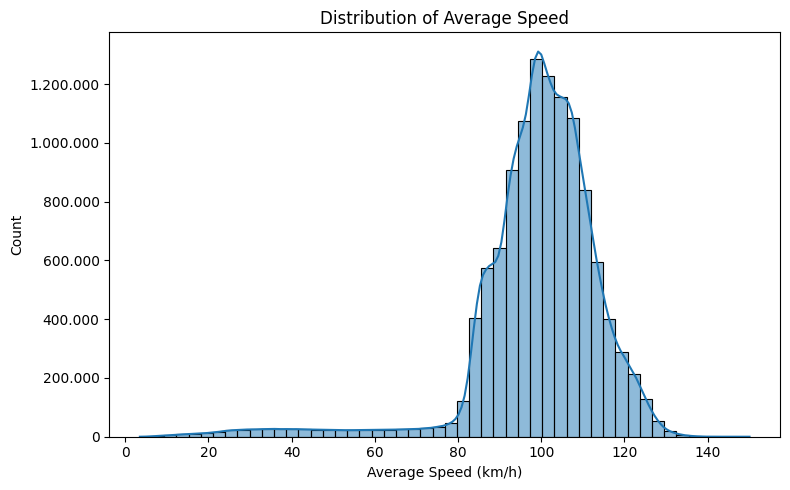

In [74]:
plt.figure(figsize=(8, 5))
ax = sb.histplot(df_st["avg_speed"], bins=50, kde=True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, pos: f"{int(x):,}".replace(",", ".")))

plt.title("Distribution of Average Speed")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Distribution of Average Speed
The distrubution of the everage speed shows a clear peak arround 100km/h
- This alligns with the standart speed limits on the dutch highway
There are also lower values visible : 60-80 km/h also arround the <40 km/h.
- This shows periods of traffic delay/jam
Higher speeds 120 km/h or higher are rarely.
- This makes sense because the max speed limit is after 19:00 increase to 120 km/h. 
- Als people like to speeding sometimes, but the number of it is very low. 

### Conclusion 
The data looks realistic and shows normal signs traffic flow and jams 

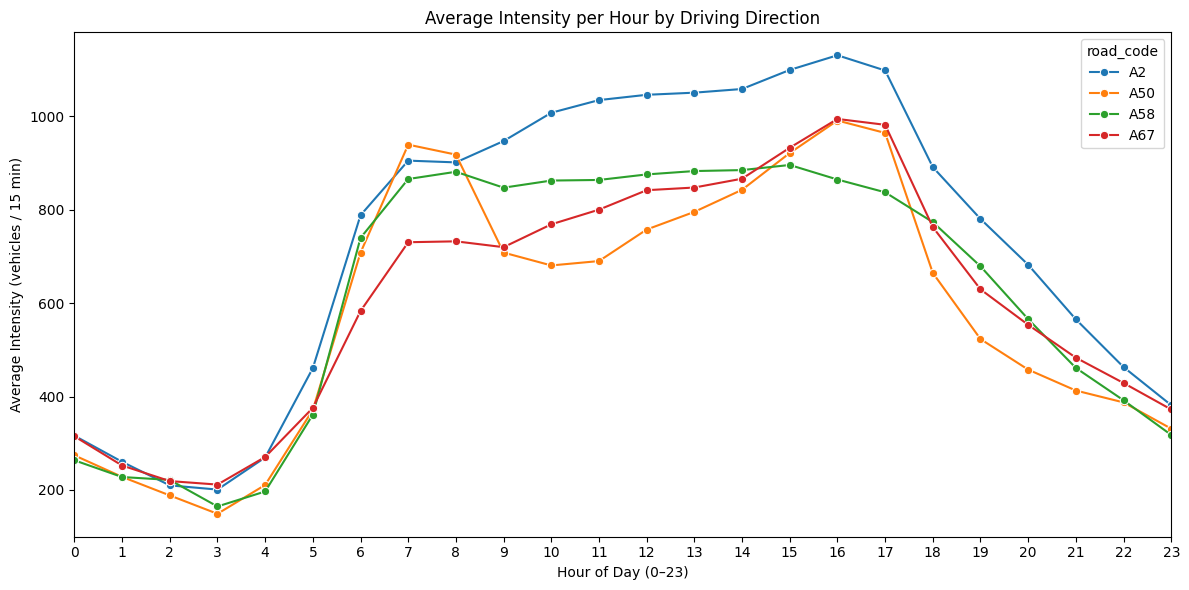

In [75]:
# Gemiddelde intensiteit per uur per rijrichting
hourly_stats = (
    df_st.groupby(["hour", "road_code"])["avg_intensity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sb.lineplot(data=hourly_stats, x="hour", y="avg_intensity",
            hue="road_code", marker="o")

plt.xticks(range(0, 24))   # alle uren tonen
plt.xlim(0, 23)
plt.title("Average Intensity per Hour by Driving Direction")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Intensity (vehicles / 15 min)")
plt.tight_layout()
plt.show()

## Average Intensity per Hour by Road Code  

The graph shows the average traffic intensity (vehicles per 15 minutes) throughout the day, split by road code (A2, A50, A58, A67).  

- **Night (0–5h):** Low intensity (200–300 vehicles/15 min) on all roads, which matches normal night traffic patterns.  
- **Morning peak (6–9h):** Sharp increase with a clear peak around 7–9h. The **A2** stands out as the busiest road (>900 vehicles/15 min).  
- **Daytime (10–15h):** Intensity stays high and stable. The A2 remains the busiest, while A50, A58 and A67 show slightly lower values.  
- **Evening peak (16–18h):** A second peak occurs on all roads, reaching around 900–1000 vehicles/15 min.  
- **Late evening (20–23h):** Traffic decreases steadily to lower levels (200–400 vehicles/15 min).  

### Conclusion  
The data clearly shows the **daily traffic rhythm** with two peak moments: the **morning rush hour (7–9h)** and the **evening rush hour (16–18h)**.  
The **A2 consistently has the highest intensity**, confirming its role as one of the busiest highways in the Netherlands.  
All roads follow the same general pattern, which indicates that the dataset is **consistent and realistic**.  

### Source  
This pattern is consistent with official traffic information from Rijkswaterstaat and NDW, which report the A2 near Eindhoven as one of the busiest highways in the Netherlands.  

- NDW (Nationaal Dataportaal Wegverkeer): [https://ndw.nu](https://ndw.nu)  
- Rijkswaterstaat – Traffic Information: [https://www.rijkswaterstaat.nl/verkeersinformatie](https://www.rijkswaterstaat.nl/verkeersinformatie)  


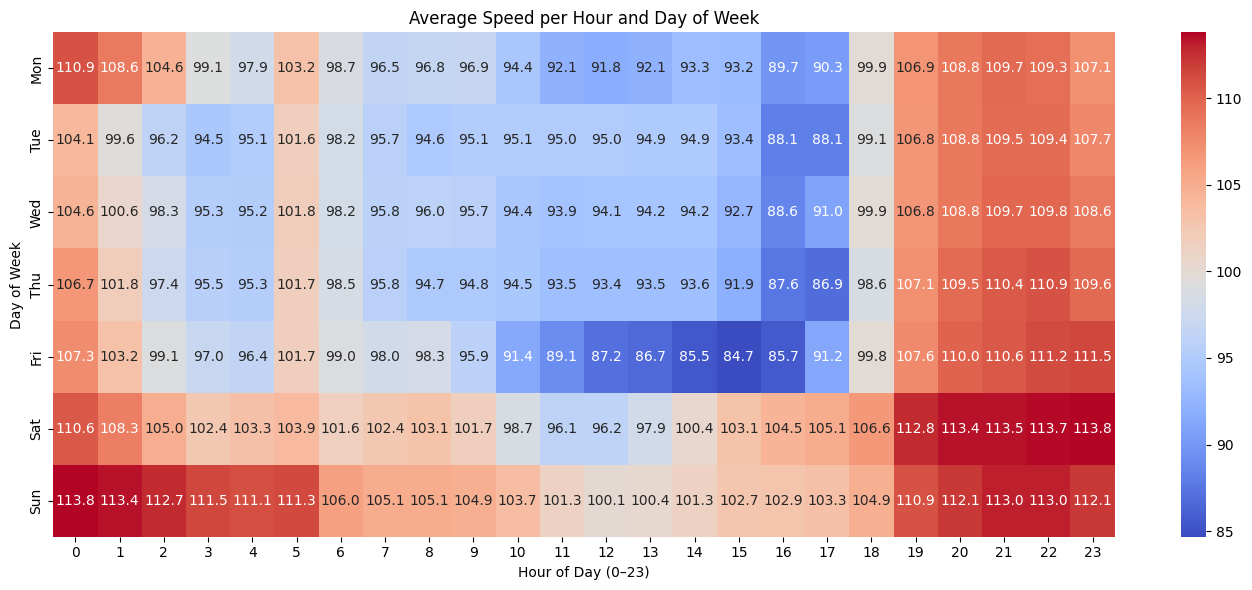

In [76]:

# Dag (0=ma .. 6=zo) en uur (0–23) toevoegen
dayOfweek = df_st["day"]
hour = df_st["hour"]

# Pivot tabel: gemiddelde snelheid per dag × uur
pivot = df_st.pivot_table(values='avg_speed',
                          index=dayOfweek,
                          columns=hour,
                          aggfunc="mean")

# Index vervangen door labels (ma..zo)
pivot.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Heatmap plotten
plt.figure(figsize=(14, 6))
sb.heatmap(pivot, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Average Speed per Hour and Day of Week")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

## Average Speed per Hour and Day of Week

This heatmap shows the average speed (km/h) per hour and day of the week.  
The values inside the cells are the exact averages, with **red = higher speeds** and **blue = lower speeds**.

- **Nighttime (0–5h):**
  - Speeds are high, mostly above **105 km/h**.
  - This makes sense because traffic is light and roads are free at night.

- **Morning rush hour (6–9h):**
  - Clear drop in speed on weekdays.
  - Around **8–9h**, speeds fall to **90–95 km/h**, and on Friday even down to **~85 km/h**.
  - This reflects heavy commuting traffic.

- **Daytime (10–15h):**
  - Speeds remain relatively low, typically between **90–97 km/h** on weekdays.
  - Indicates that traffic stays busy even outside the main rush hours.

- **Evening rush hour (16–18h):**
  - Another noticeable dip, with speeds often down to **85–90 km/h**.
  - Friday evening shows the strongest congestion effect.

- **Late evening (19–23h):**
  - Speeds rise again, above **105 km/h**, reaching **110 km/h** or more.
  - On weekends (Sat–Sun), speeds are even higher (**~113 km/h**), reflecting less work traffic and fewer jams.

### Conclusion
- **Weekdays** show a clear rush hour pattern: lower speeds in the morning and evening peaks.  
- **Weekends** have higher average speeds, often above **110 km/h**, since there is less commuting traffic.  
- The heatmap confirms the **inverse relationship between traffic intensity and speed**: more cars mean lower speeds, while free-flow conditions result in higher speeds.  


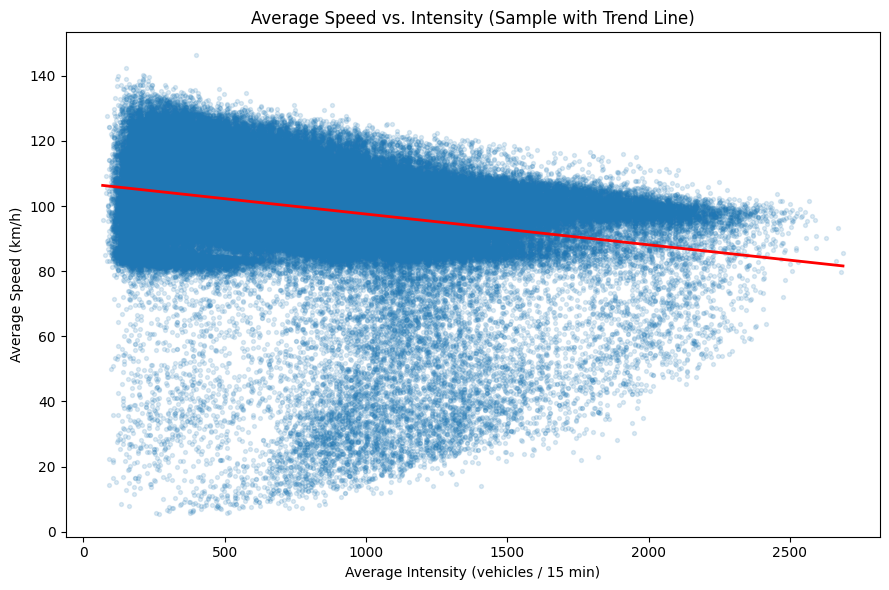

In [77]:
# Neem een representatieve steekproef (200.000 punten)
sample = df_st.sample(n=200_000, random_state=42)

plt.figure(figsize=(9, 6))

# Scatterplot met regressielijn
sb.regplot(
    x="avg_intensity",
    y="avg_speed",
    data=sample,
    scatter_kws={"alpha": 0.15, "s": 8},  # transparant, kleine puntjes
    line_kws={"color": "red", "linewidth": 2}  # regressielijn
)

plt.title("Average Speed vs. Intensity (Sample with Trend Line)")
plt.xlabel("Average Intensity (vehicles / 15 min)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

## Average Speed vs. Intensity (Scatter with Trend Line)

This scatterplot (based on a random sample of 200,000 data points) shows the relationship between **average intensity (x-axis)** and **average speed (y-axis)**. The red line represents a linear regression fit, highlighting the overall trend.  

- **Overall trend (red line):**  
  - A clear **negative slope** is visible: higher traffic intensity corresponds to lower average speed.  
  - This confirms the typical traffic pattern: **more cars = higher chance of congestion = lower speed**.  

- **Low intensity (<500 vehicles / 15 min):**  
  - Large variation in speeds, ranging from near 0 km/h (standstill) to 130+ km/h.  
  - This reflects both quiet nighttime traffic (high speeds) and small jams where intensity is low but traffic stops.  

- **Medium intensity (500–2000):**  
  - Most points cluster between **80–110 km/h**.  
  - This represents normal daytime conditions: traffic is heavy but still moving.  

- **High intensity (>2000 vehicles / 15 min):**  
  - Speeds more often drop below **90 km/h**.  
  - This shows **congestion or severe peak-hour traffic**.  

- **Lower band (0–40 km/h):**  
  - Indicates **traffic jams or stop-and-go traffic**.  
  - Appears at different intensity levels but more frequent at high intensity.  

### Conclusion
- The scatterplot clearly shows a **negative relationship** between intensity and speed.  
- The relationship is **not perfectly linear** (the red line is just a simplification), but the trend is correct: higher intensity generally means lower speed.  
- This confirms that a **machine learning model** (e.g., Random Forest) is more suitable than a simple linear model, as it can capture these complex nonlinear patterns.  


### **Merging with Traffic Jam Data**

In [78]:
from helpers.Merge_join_helpers import normalize_ref_text, to_meaningful_keys, token_overlap

df_jam = pd.read_csv('./data/df_jam_clean.csv')

In [79]:
df_st["vild_primary_name_norm"] = df_st["name_measuring_location"].map(
    normalize_ref_text)

df_st["vild_primary_tokens"] = df_st["name_measuring_location"].map(
    to_meaningful_keys)

In [80]:

df_jam[["start_time", "end_time_filled", "vild_primary_name_norm", "vild_primary_tokens",
        "driving_direction", "vild_primary_tokens", "road_code"]]

,start_time,end_time_filled,vild_primary_name_norm,vild_primary_tokens,driving_direction,vild_primary_tokens,road_code
0,2025-01-03 07:36:24,2025-01-03 07:37:28,de hogt,{'hogt'},northBound,{'hogt'},A2
1,2025-01-03 07:36:24,2025-01-03 07:37:41,de hogt,{'hogt'},northBound,{'hogt'},A2
2,2025-01-03 07:36:24,2025-01-03 07:38:16,de hogt,{'hogt'},northBound,{'hogt'},A2
3,2025-01-03 10:33:28,2025-01-03 10:34:36,batadorp,{'batadorp'},southBound,{'batadorp'},A2
4,2025-01-03 10:33:28,2025-01-03 10:35:06,batadorp,{'batadorp'},southBound,{'batadorp'},A2
...,...,...,...,...,...,...,...
85640,2025-09-26 20:38:27,2025-09-26 21:26:00,brug over het beatrixkanaal,"{'beatrixkanaal', 'over', 'brug'}",westBound,"{'beatrixkanaal', 'over', 'brug'}",A58
85641,2025-09-26 20:38:27,2025-09-26 21:27:00,brug over het beatrixkanaal,"{'beatrixkanaal', 'over', 'brug'}",westBound,"{'beatrixkanaal', 'over', 'brug'}",A58
85642,2025-09-26 20:38:27,2025-09-26 21:28:00,brug over het beatrixkanaal,"{'beatrixkanaal', 'over', 'brug'}",westBound,"{'beatrixkanaal', 'over', 'brug'}",A58
85643,2025-09-26 20:38:27,2025-09-26 21:29:00,brug over het beatrixkanaal,"{'beatrixkanaal', 'over', 'brug'}",westBound,"{'beatrixkanaal', 'over', 'brug'}",A58


In [81]:
df_st.shape

(11575053, 16)

In [82]:
df_jam.shape

(85645, 22)

In [91]:
df_sample = df_st.sample(n=100, random_state=42)

# 1) Merge op road+dir (alleen candidates)
merged = df_sample.merge(
    df_jam,
    left_on=["road_code", "driving_direction"],
    right_on=["road_code", "driving_direction"],
    how="inner",
    suffixes=("_meas", "_jam")
)

# 2) Tijd-overlap
mask_time = (
    (merged["start_time"] <= merged["end_measurement_period"]) &
    (merged["end_time_filled"] >= merged["start_measurement_period"])
)
merged = merged[mask_time]

# 3) Token-overlap
merged["vild_primary_tokens"] = merged.apply(token_overlap, axis=1)
merged = merged[merged["vild_primary_tokens"]].drop(
    columns=["vild_primary_tokens"])

MemoryError: Unable to allocate 218. MiB for an array with shape (15, 1902912) and data type object